Code with new CSV

Research questions: What is the relationship between income & breast cancer survival months? Is there one?
What is the relationship between race & breast cancer survival months? Is there one?
What is the relationship between age & breast cancer survival months? Is there one?
What is the relationship between income & stage at diagnosis? Is there one?
What is the relationship between race & stage at diagnosis? Is there one?
What is the relationship between age & stage at diagnosis? Is there one?
How do the breast cancer stages (T, N, M) affect survival months?

Below is the imports for the project

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr


import pandas as pd
import numpy as np
import sklearn as sklearn

CSV File

In [2]:
data = pd.read_csv("bcfile.csv")

In [3]:
df = pd.DataFrame(data)

Getting a sense of how the data looks

In [5]:
df.head

<bound method NDFrame.head of         Race recode (W, B, AI, API) Breast - Adjusted AJCC 6th T (1988-2015)  \
0                             White                                 Blank(s)   
1                             White                                 Blank(s)   
2                             White                                 Blank(s)   
3                             White                                 Blank(s)   
4                             White                                 Blank(s)   
...                             ...                                      ...   
8720790                       White                                 Blank(s)   
8720791                       White                                 Blank(s)   
8720792                       White                                 Blank(s)   
8720793                       White                                 Blank(s)   
8720794                       White                                 Blank(s)   

        B

In [4]:
df.columns

Index(['Race recode (W, B, AI, API)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)', 'Patient ID',
       'Age recode with single ages and 85+',
       'Median household income inflation adj to 2019', 'Survival months'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720795 entries, 0 to 8720794
Data columns (total 8 columns):
 #   Column                                         Dtype 
---  ------                                         ----- 
 0   Race recode (W, B, AI, API)                    object
 1   Breast - Adjusted AJCC 6th T (1988-2015)       object
 2   Breast - Adjusted AJCC 6th N (1988-2015)       object
 3   Breast - Adjusted AJCC 6th M (1988-2015)       object
 4   Patient ID                                     int64 
 5   Age recode with single ages and 85+            object
 6   Median household income inflation adj to 2019  object
 7   Survival months                                object
dtypes: int64(1), object(7)
memory usage: 532.3+ MB


In [5]:
df.describe()

,Patient ID
count,8.720795e+06
mean,3.280007e+07
std,1.796316e+07
min,2.100000e+01
25%,1.678673e+07
50%,3.429164e+07
75%,4.956419e+07
max,6.321090e+07


Get rid of 'Blanks', nan, and 'Unknown'

In [8]:
df.isna().any()

Race recode (W, B, AI, API)                      False
Breast - Adjusted AJCC 6th T (1988-2015)         False
Breast - Adjusted AJCC 6th N (1988-2015)         False
Breast - Adjusted AJCC 6th M (1988-2015)         False
Patient ID                                       False
Age recode with single ages and 85+              False
Median household income inflation adj to 2019    False
Survival months                                  False
dtype: bool

In [4]:
df.dropna(inplace=True)

In [5]:
# drop na seems to have removed 'Blanks' rows
df = df[~df['Breast - Adjusted AJCC 6th T (1988-2015)'].str.contains('Blank\(s\)')]

In [6]:
# drop na seems to have removed 'Unknown' rows
df = df[~df['Survival months'].str.contains('Unknown')]

In [11]:
print(df['Breast - Adjusted AJCC 6th T (1988-2015)'].unique())

['TX Adjusted' 'Tis' 'T4a' 'T4b' 'T1c' 'T3' 'T1b' 'T1a' 'T4d'
 'Any T, Mets' 'T2' 'T1mic' 'T4c' 'T0']


In [14]:
print(df['Breast - Adjusted AJCC 6th N (1988-2015)'].unique())

['NX Adjusted' 'N0' 'N1' 'N3' 'N2']


In [12]:
print(df['Breast - Adjusted AJCC 6th M (1988-2015)'].unique())

['M0' 'MX' 'M1']


In [7]:
# checks for nan's and blanks after
df.isna().any()

Race recode (W, B, AI, API)                      False
Breast - Adjusted AJCC 6th T (1988-2015)         False
Breast - Adjusted AJCC 6th N (1988-2015)         False
Breast - Adjusted AJCC 6th M (1988-2015)         False
Patient ID                                       False
Age recode with single ages and 85+              False
Median household income inflation adj to 2019    False
Survival months                                  False
dtype: bool

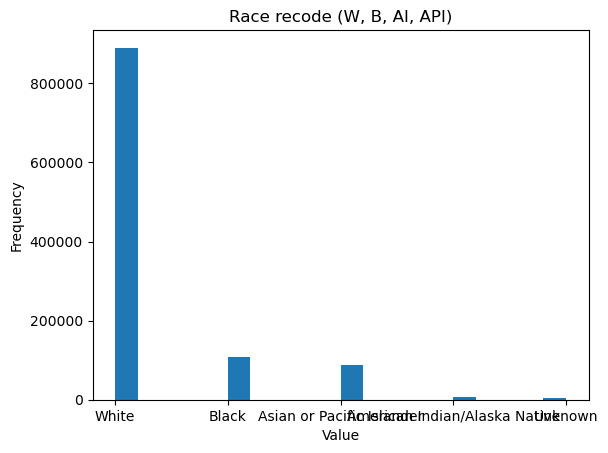

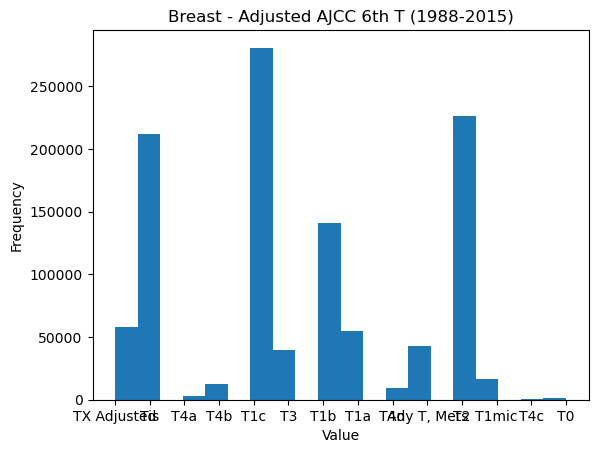

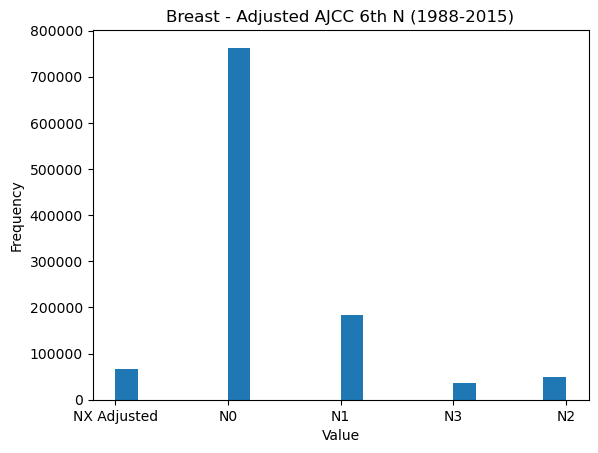

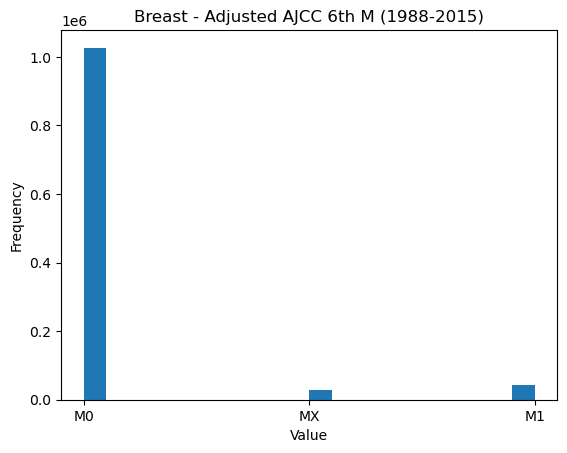

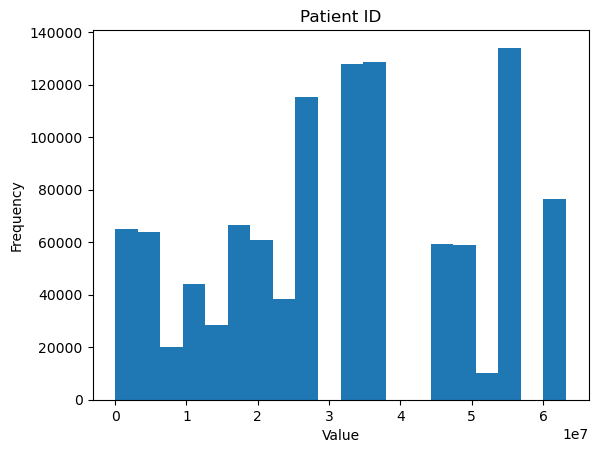

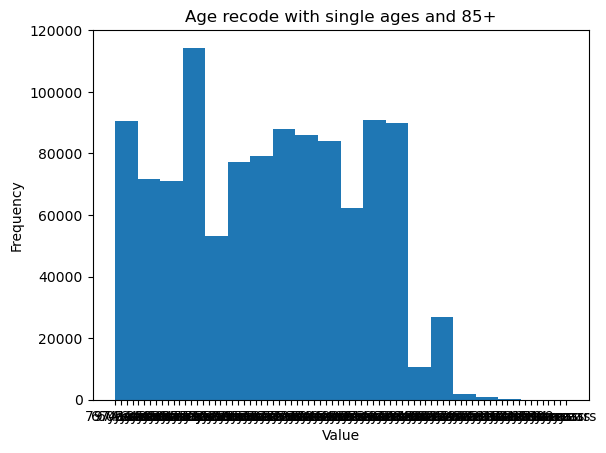

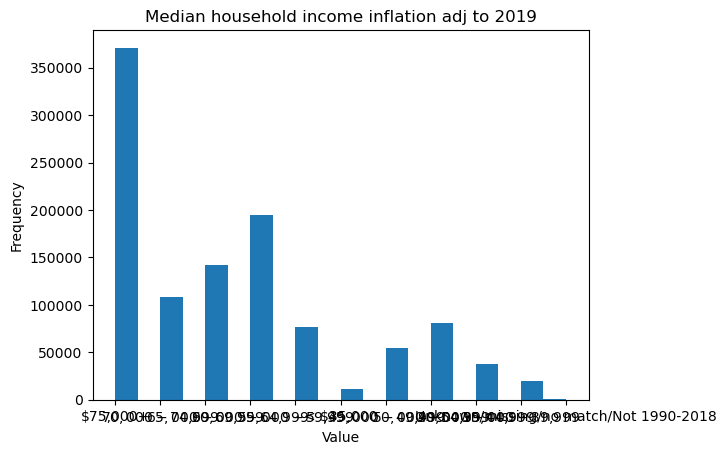

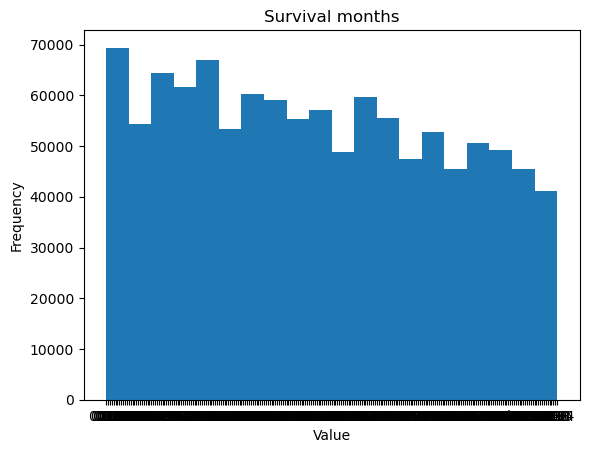

In [20]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

One hot encoding for columns

In [8]:
race_encode = 'Race recode (W, B, AI, API)'

race_encoded = pd.get_dummies(df[race_encode], prefix = race_encode)

df = pd.concat([df, race_encoded], axis=1)

df.drop('Race recode (W, B, AI, API)', axis=1, inplace=True)

In [9]:
sixthstage_encode = 'Breast - Adjusted AJCC 6th T (1988-2015)'

sixthstage_encoded = pd.get_dummies(df[sixthstage_encode], prefix = sixthstage_encode)

df = pd.concat([df, sixthstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th T (1988-2015)', axis=1, inplace=True)

In [10]:
nstage_encode = 'Breast - Adjusted AJCC 6th N (1988-2015)'

nstage_encoded = pd.get_dummies(df[nstage_encode], prefix = nstage_encode)

df = pd.concat([df, nstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th N (1988-2015)', axis=1, inplace=True)

In [11]:
mstage_encode = 'Breast - Adjusted AJCC 6th M (1988-2015)'

mstage_encoded = pd.get_dummies(df[mstage_encode], prefix = mstage_encode)

df = pd.concat([df, mstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th M (1988-2015)', axis=1, inplace=True)

Cleaning data for age, income, and race

In [12]:
# instead of encoding age, remove "years" from value and change it to int type
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].str.replace(' years', '')

# # there is a value with 85+ years, so replace '85+' with 85
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].replace('85+', '85')

# convert 'Age recode' column to int
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].astype(int)

In [40]:
print(df['Age recode with single ages and 85+'].unique())

[79 67 60 74 41 54 64 35 44 82 83 56 84 62 85 71 59 75 30 34 58 78 50 36
 55 57 68 53 37 61 52 76 72 77 63 80 70 49 45 42 48 46 28 65 81 73 66 43
 47 69 51 29 31 38 40 39 32 33 21 27 24 26 22 23 25 18 20 19 17 13  2 16
 12 15  8 10 14  9]


In [13]:
income_encode = 'Median household income inflation adj to 2019'

income_encoded = pd.get_dummies(df[income_encode], prefix = income_encode)

df = pd.concat([df, income_encoded], axis=1)

df.drop('Median household income inflation adj to 2019', axis=1, inplace=True)

In [49]:
print(income_encoded.columns.unique())

Index(['Median household income inflation adj to 2019_$35,000 - $39,999',
       'Median household income inflation adj to 2019_$40,000 - $44,999',
       'Median household income inflation adj to 2019_$45,000 - $49,999',
       'Median household income inflation adj to 2019_$50,000 - $54,999',
       'Median household income inflation adj to 2019_$55,000 - $59,999',
       'Median household income inflation adj to 2019_$60,000 - $64,999',
       'Median household income inflation adj to 2019_$65,000 - $69,999',
       'Median household income inflation adj to 2019_$70,000 - $74,999',
       'Median household income inflation adj to 2019_$75,000+',
       'Median household income inflation adj to 2019_< $35,000',
       'Median household income inflation adj to 2019_Unknown/missing/no match/Not 1990-2018'],
      dtype='object')


In [50]:
print(race_encoded.columns.unique())

Index(['Race recode (W, B, AI, API)_American Indian/Alaska Native',
       'Race recode (W, B, AI, API)_Asian or Pacific Islander',
       'Race recode (W, B, AI, API)_Black',
       'Race recode (W, B, AI, API)_Unknown',
       'Race recode (W, B, AI, API)_White'],
      dtype='object')


In [45]:
print(df['Survival months'].unique())

[ 14   0  81   7 224  48  50 130  28  87  75  69  89 182  10 129  74 192
  17 225  15 147  62 161  72 146  43  76 115  19  99  70  29 101  58  12
 103  94  53  98 218  18 223  21  49 171  92 160 222  42 142  65  59  56
  44 151  54 131 106 117  55 116   5 197 172 122  32 206 239  85 174 120
 107 138  83  73  24 150   2  96  33   4  40  67  57   9 100 105 123 186
  22  68 104 217 215 210 178 163  31 211  34 119 154  93 143 111  51  47
   8 185  86 159  52  61 149 221  13  88 234 139 204 200 135 193 220 212
  90  91  37  45 158 109 125 152 113  11  97 187  25 227  80 137  64 112
 128 203 144  95  71 148  84 230 237 167  82 214 145 205 209  79 236  46
 213 134 133 232 108 153  26 155  60 164 165 136 124 102   6 195  35  20
 219 233 179 170 228 110  41   1 173  66  36  38 181 140 162  16 201  78
 156 191  77 132 229 198 141 207 169 226 121 176  63  39   3 177 126  23
 175 127 188 199 183  27 208 166  30 157 118 114 168 235 231 184 190 189
 216 202 180 238 196 194]


In [14]:
df['Survival months'] = df['Survival months'].astype(int)

In [ ]:
# convert survival months to bool for kfold validation

In [43]:
print(df.dtypes)

Patient ID                                                                              int64
Age recode with single ages and 85+                                                     int32
Survival months                                                                         int32
Race recode (W, B, AI, API)_American Indian/Alaska Native                               uint8
Race recode (W, B, AI, API)_Asian or Pacific Islander                                   uint8
Race recode (W, B, AI, API)_Black                                                       uint8
Race recode (W, B, AI, API)_Unknown                                                     uint8
Race recode (W, B, AI, API)_White                                                       uint8
Breast - Adjusted AJCC 6th T (1988-2015)_Any T, Mets                                    uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T0                                             uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T1a                

Rerun original code

In [31]:
folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

# Define the machine learning model
model = LinearRegression()

In [32]:
i = 0
# Iterate over the K folds
for train_index, val_index in kf.split(df):

    # Split the data into training and validation sets
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]


    # Define the one hot encoded columns
    cols = df.columns
    cols_list = cols.tolist()
    cols_three = pd.concat([race_encoded, pd.DataFrame(df['Age recode with single ages and 85+']), income_encoded], axis=1)

    # Define training vars
    X_train = train_data[cols_three.columns]
    X_val = val_data[cols_three.columns]
    y_train = train_data['Survival months'].astype(bool)
    y_val = val_data['Survival months'].astype(bool)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate mean squared error on validation
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    i = i+1
    print(f"Fold {i} MSE: {mse:.2f} R2: {r2:.2f}")


Fold 1 MSE: 0.01 R2: 0.01
Fold 2 MSE: 0.01 R2: 0.01
Fold 3 MSE: 0.01 R2: 0.01
Fold 4 MSE: 0.01 R2: 0.01
Fold 5 MSE: 0.01 R2: 0.01


Linear Regression with PCA

In [19]:
X = pd.concat([race_encoded, pd.DataFrame(df['Age recode with single ages and 85+']), income_encoded], axis=1)
y = df['Survival months']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [20]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [24]:
# perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

In [25]:
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.11362158 0.08649776 0.07152811]


This means that the total variance for PCA is low (around 27.16% in total). Since I applied PCA, low total variance means that the total amount of variability in the data captured by the principal components is relatively small. I assume this is happening because there is a predominant amount of one value (in race_encoded) that makes the data more homogenous.

Experiment with Spearmanr Coefficient (rec by Sheena) to see if there is a relationship between variables, this is displayed as a matrix, doesn't tell me much.

In [27]:
corr, pval = spearmanr(X, y)

print("Spearmanr Coefficient: %0.3f", corr)

Spearmanr Coefficient: %0.3f [[ 1.00000000e+00 -2.17490729e-02 -2.42697660e-02 -5.25407393e-03
  -1.51930270e-01 -1.68546936e-02  8.17771248e-03 -1.51319248e-03
   3.85056782e-03  1.46367113e-02  1.56394062e-04 -1.37815470e-02
  -6.72016117e-03 -9.71360266e-03  8.19307338e-03  9.50920975e-03
   3.36588843e-03 -5.17439641e-03]
 [-2.17490729e-02  1.00000000e+00 -9.78230604e-02 -2.11773608e-02
  -6.12378546e-01 -7.82811939e-02 -3.80369694e-02 -5.12212205e-02
  -5.80078105e-02 -6.38734505e-02 -4.62397692e-02  3.61656843e-02
  -2.45085063e-02 -3.44549237e-02  1.33628484e-01 -2.94367174e-02
  -4.45412628e-03  8.45932925e-03]
 [-2.42697660e-02 -9.78230604e-02  1.00000000e+00 -2.36317931e-02
  -6.83352529e-01 -5.81259081e-02  6.44433136e-02  8.84588386e-02
   2.52325970e-02  1.84933273e-02  2.46756765e-02  2.24403114e-02
  -5.70832280e-03 -2.71335539e-02 -8.81169350e-02  1.75323409e-02
  -4.11841243e-03 -5.89436374e-02]
 [-5.25407393e-03 -2.11773608e-02 -2.36317931e-02  1.00000000e+00
  -1.479

What is the relationship between income & breast cancer survival months? Is there one?